In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('adult.data')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [93]:
df.columns = (['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
               'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [84]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [95]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Encode categorical variables (LDA requires numerical input)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target

# Standardize the features (LDA performs better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit LDA and transform training data
X_test_lda = lda.transform(X_test)  # Transform test data

# Check the shape of the transformed data
print("Shape of transformed training data:", X_train_lda.shape)
print("Shape of transformed test data:", X_test_lda.shape)

# Train a classifier on the transformed data (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions
y_pred = classifier.predict(X_test_lda)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Shape of transformed training data: (22792, 1)
Shape of transformed test data: (9768, 1)
Accuracy: 0.8118345618345618
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7395
           1       0.67      0.45      0.54      2373

    accuracy                           0.81      9768
   macro avg       0.75      0.69      0.71      9768
weighted avg       0.80      0.81      0.80      9768



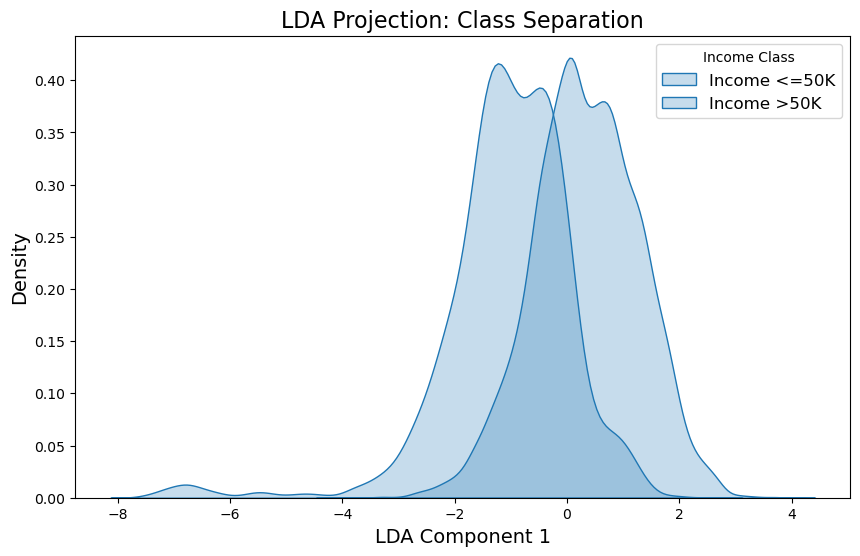

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the transformed data (1D projection)
plt.figure(figsize=(10, 6))

# Create a histogram or density plot for each class
sns.kdeplot(X_train_lda[y_train == 0], label='Income <=50K', fill=True, color='orange')
sns.kdeplot(X_train_lda[y_train == 1], label='Income >50K', fill=True, color='red')

# Add labels and title
plt.title('LDA Projection: Class Separation', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Income Class', fontsize=12)

# Show the plot
plt.show()

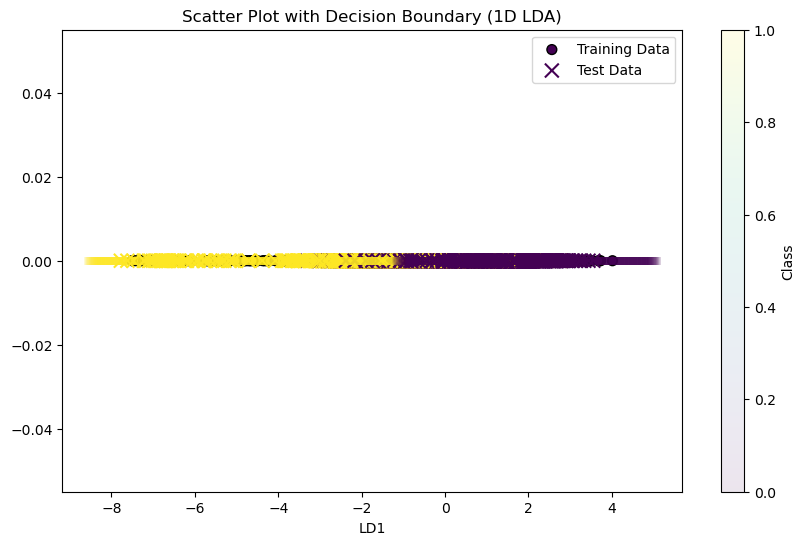

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Check if X_train_lda is 1D
if X_train_lda.shape[1] == 1:
    # Scatter plot for the transformed training data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis', edgecolor='k', s=50, label='Training Data')
    
    # Scatter plot for the transformed test data
    plt.scatter(X_test_lda, np.zeros_like(X_test_lda), c=y_test, cmap='viridis', marker='x', s=100, label='Test Data')
    
    # Plot the decision boundary
    # Create a grid of points to evaluate the classifier
    x_min, x_max = X_train_lda.min() - 1, X_train_lda.max() + 1
    xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
    
    # Predict the class for each point in the grid
    Z = classifier.predict(xx)
    
    # Plot the decision boundary
    plt.scatter(xx, np.zeros_like(xx), c=Z, alpha=0.1, cmap='viridis', marker='|', linewidths=10)
    
    plt.xlabel('LD1')
    plt.title('Scatter Plot with Decision Boundary (1D LDA)')
    plt.legend()
    plt.colorbar(label='Class')
    plt.show()
else:
    print("The transformed data is not 1D. Adjust the code for higher dimensions.")

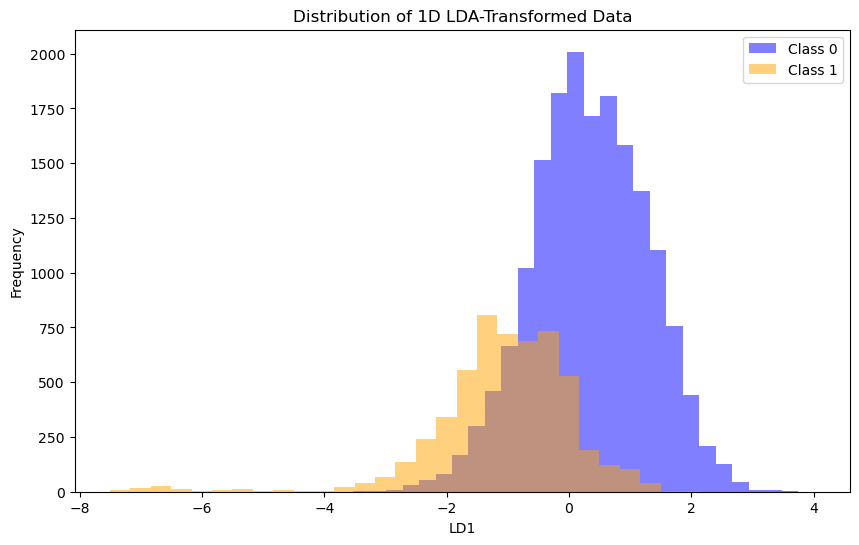

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(X_train_lda[y_train == 0], bins=30, alpha=0.5, label='Class 0', color='blue')
plt.hist(X_train_lda[y_train == 1], bins=30, alpha=0.5, label='Class 1', color='orange')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.title('Distribution of 1D LDA-Transformed Data')
plt.legend()
plt.show()

In [99]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Encode categorical variables (LDA requires numerical input)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop(columns=['marital-status'])  # Features
y = df['marital-status']  # Target

# Standardize the features (LDA performs better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit LDA and transform training data
X_test_lda = lda.transform(X_test)  # Transform test data

# Check the shape of the transformed data
print("Shape of transformed training data:", X_train_lda.shape)
print("Shape of transformed test data:", X_test_lda.shape)

# Train a classifier on the transformed data (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions
y_pred = classifier.predict(X_test_lda)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Shape of transformed training data: (22792, 6)
Shape of transformed test data: (9768, 6)
Accuracy: 0.7006552006552007
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.32      0.36      1349
           1       0.00      0.00      0.00         7
           2       0.77      0.84      0.80      4501
           3       0.00      0.00      0.00       130
           4       0.70      0.80      0.74      3176
           5       0.00      0.00      0.00       308
           6       0.65      0.39      0.49       297

    accuracy                           0.70      9768
   macro avg       0.36      0.34      0.34      9768
weighted avg       0.66      0.70      0.68      9768



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [71]:
df['marital-status'].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: marital-status, dtype: int64

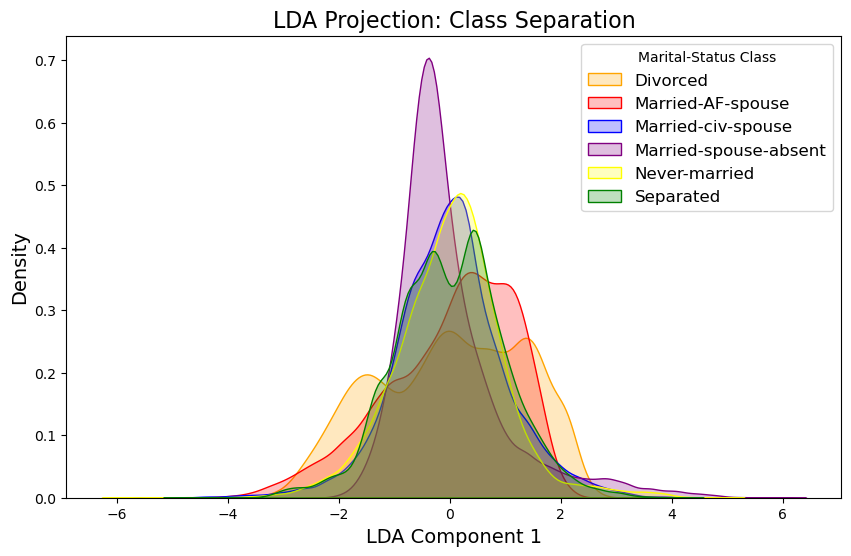

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the transformed data (1D projection)
plt.figure(figsize=(10, 6))

# Create a histogram or density plot for each class
sns.kdeplot(X_train_lda[:, 0], label = 'Divorced', fill=True, color='orange')
sns.kdeplot(X_train_lda[:, 1], label='Married-AF-spouse', fill=True, color='red')
sns.kdeplot(X_train_lda[:, 2], label='Married-civ-spouse', fill=True, color='blue')
sns.kdeplot(X_train_lda[:, 3], label='Married-spouse-absent', fill=True, color='purple')
sns.kdeplot(X_train_lda[:, 4], label='Never-married', fill=True, color='yellow')
sns.kdeplot(X_train_lda[:, 5], label='Separated', fill=True, color='green')
# Add labels and title
plt.title('LDA Projection: Class Separation', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Marital-Status Class', fontsize=12)

# Show the plot
plt.show()